# Data Import & Setup
Load libraries and import the dataset.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
df = pd.read_csv("data/data.csv")
df.head()

,FeatureX,FeatureY,User_ID,Countries_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month,creation_date,job_count,...,subm count 7,subm count 5,subm count 4,comments_count,discussions_count,hour,minute,second,activity_count,target
0,0,0,ID_DC6S4E9O,X9GR,19:33:13.663391,1,6,16,0001-06-16 00:00:00,0,...,0,0,0,0,0,19,33,13,11,0
1,1,0,ID_E8S97OUT,X9GR,22:18:18.228921,1,5,27,0001-05-27 00:00:00,2,...,0,1,0,0,0,22,18,18,167,1
2,0,0,ID_QZ1HASL3,X9GR,23:13:03.266635,1,6,1,0001-06-01 00:00:00,0,...,0,0,0,0,0,23,13,3,21,0
3,1,0,ID_SDV9Q3E9,X9GR,09:50:09.697573,1,5,27,0001-05-27 00:00:00,0,...,0,0,0,0,1,9,50,9,106,1
4,1,0,ID_W942LN7F,X9GR,13:33:06.531662,1,6,16,0001-06-16 00:00:00,0,...,0,0,0,2,0,13,33,6,66,0


# Data Overview
Show target distribution, missing values, and summary statistics.

In [2]:
display(df['target'].value_counts(normalize=True))
display(df.isna().sum().sort_values(ascending=False))
display(df.describe())

target
0    0.855635
1    0.144365
Name: proportion, dtype: float64

Countries_ID               5882
FeatureY                      0
FeatureX                      0
User_ID                       0
Created At time               0
Created At Year               0
Created At Month              0
Created At Day_of_month       0
creation_date                 0
job_count                     0
blog_activity_count           0
competitons_count             0
subm count 10                 0
subm count 3                  0
subm count 8                  0
subm count 9                  0
subm count 6                  0
subm count 7                  0
subm count 5                  0
subm count 4                  0
comments_count                0
discussions_count             0
hour                          0
minute                        0
second                        0
activity_count                0
target                        0
dtype: int64

,FeatureX,FeatureY,Created At Year,Created At Month,Created At Day_of_month,job_count,blog_activity_count,competitons_count,subm count 10,subm count 3,...,subm count 7,subm count 5,subm count 4,comments_count,discussions_count,hour,minute,second,activity_count,target
count,12413.000000,12413.000000,12413.0,12413.000000,12413.000000,12413.000000,12413.000000,12413.000000,12413.000000,12413.000000,...,12413.000000,12413.000000,12413.000000,12413.000000,12413.000000,12413.000000,12413.000000,12413.000000,12413.000000,12413.000000
mean,0.085314,0.528237,1.0,7.122855,16.305970,0.091436,0.091436,0.588576,0.071538,0.002256,...,0.002095,0.000886,0.000564,0.031821,0.096995,11.790139,29.288407,29.837267,21.458713,0.144365
std,0.279359,0.891619,0.0,1.928793,9.023629,0.508486,0.508486,0.961885,0.295589,0.049111,...,0.047450,0.029757,0.023741,0.396613,0.411839,5.360545,17.355177,17.354736,36.636287,0.351473
min,0.000000,0.000000,1.0,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.0,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,14.000000,15.000000,7.000000,0.000000
50%,0.000000,0.000000,1.0,7.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,29.000000,30.000000,12.000000,0.000000
75%,0.000000,1.000000,1.0,9.000000,25.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,44.000000,45.000000,23.000000,0.000000
max,1.000000,3.000000,1.0,10.000000,31.000000,10.000000,10.000000,14.000000,5.000000,2.000000,...,2.000000,1.000000,1.000000,16.000000,10.000000,23.000000,59.000000,59.000000,1575.000000,1.000000


# Numeric Feature Distributions
Plot distributions of all numeric features by target.

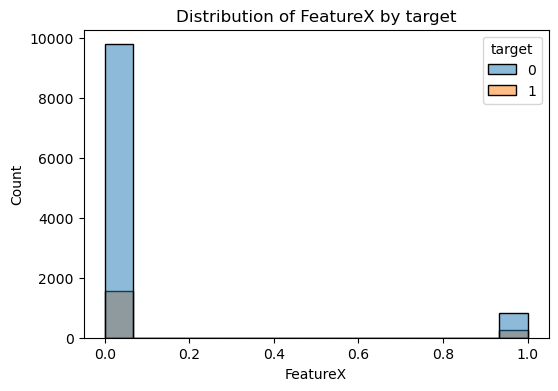

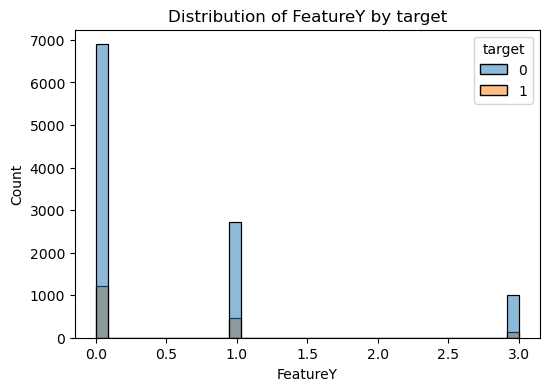

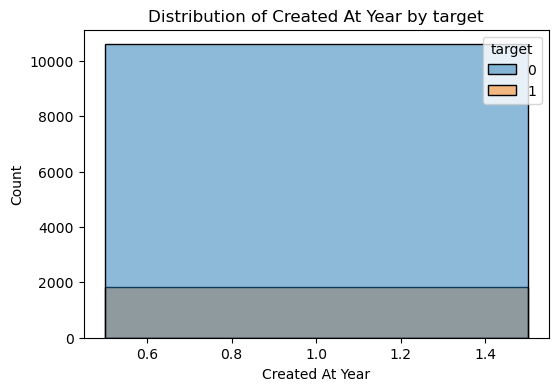

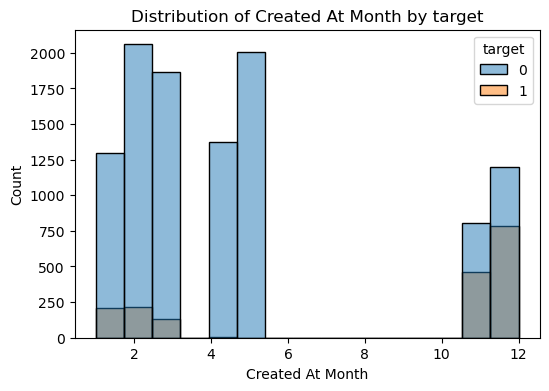

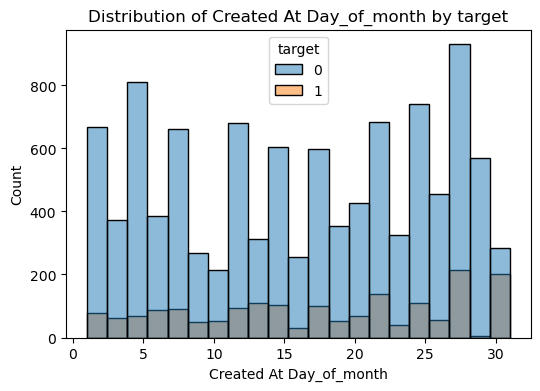

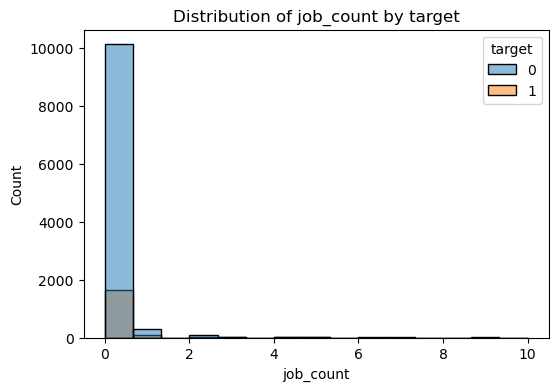

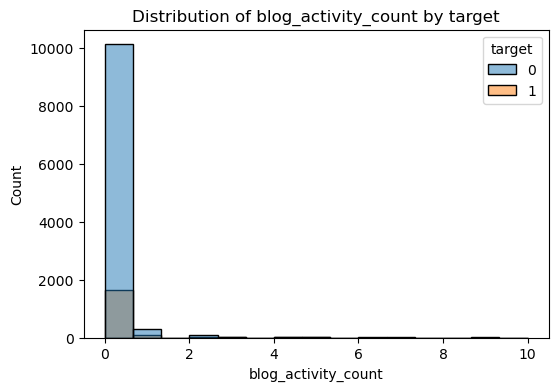

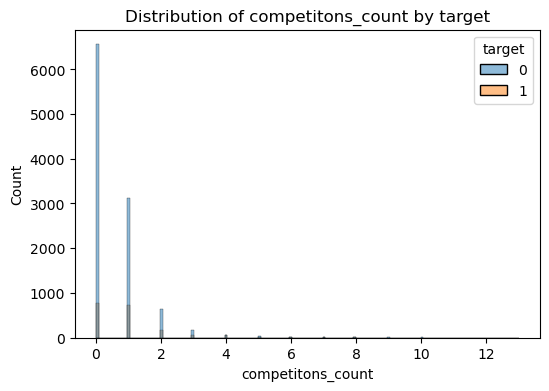

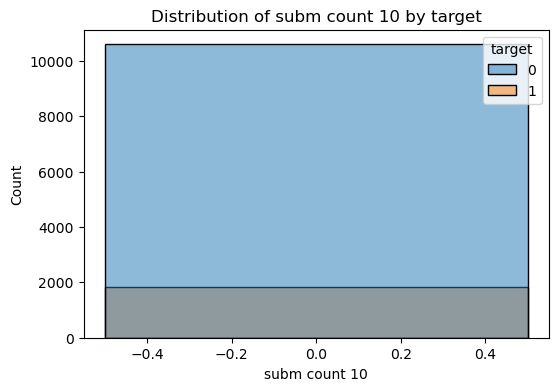

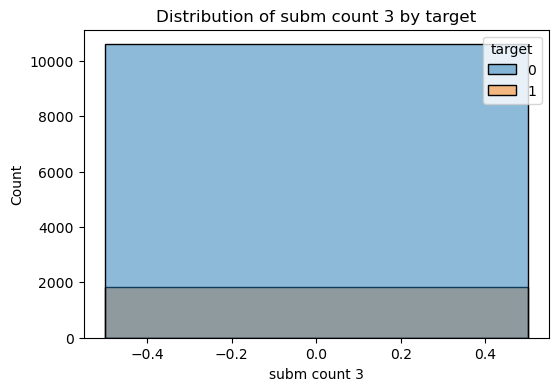

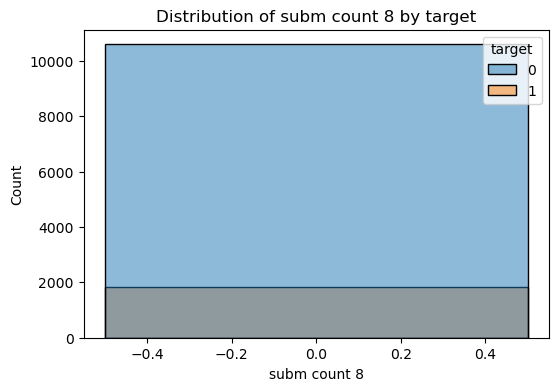

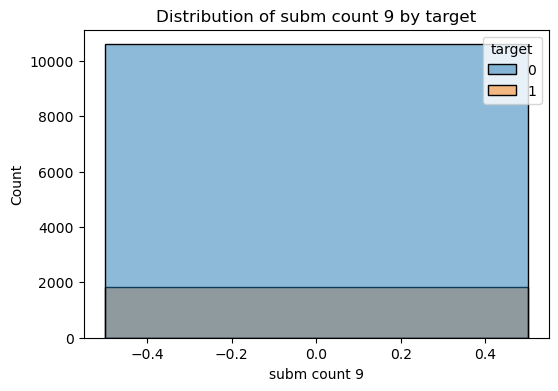

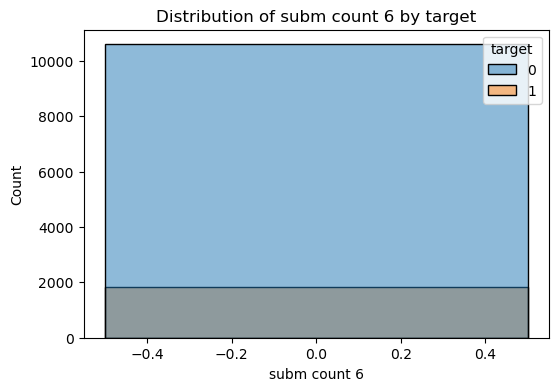

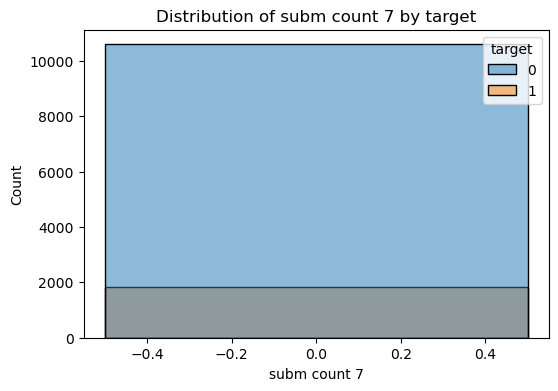

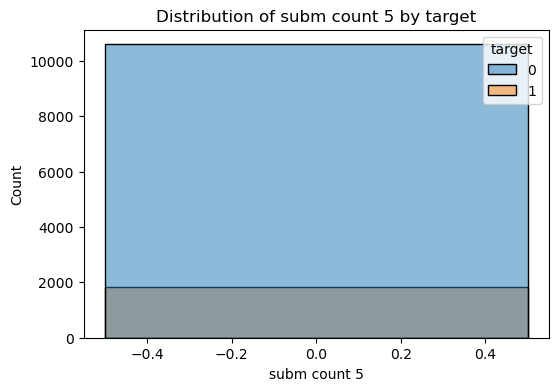

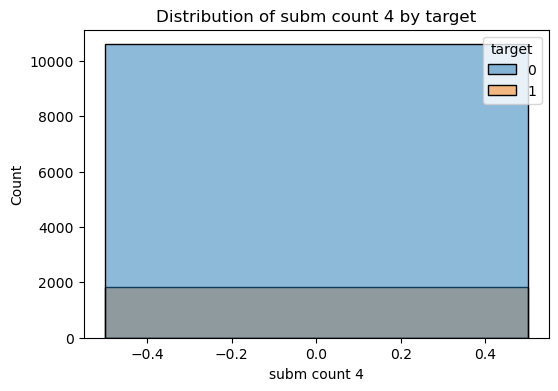

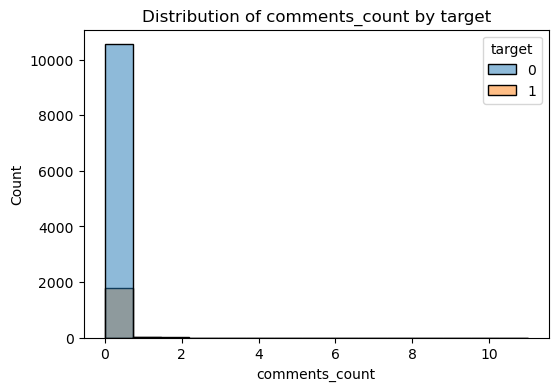

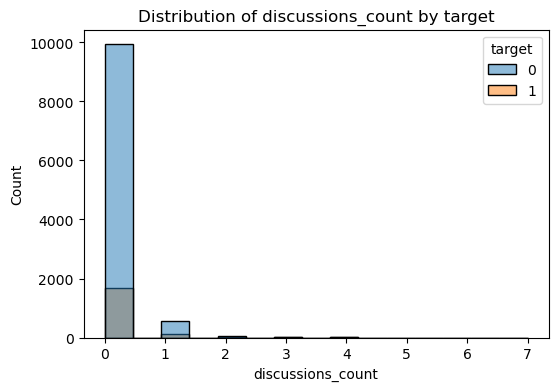

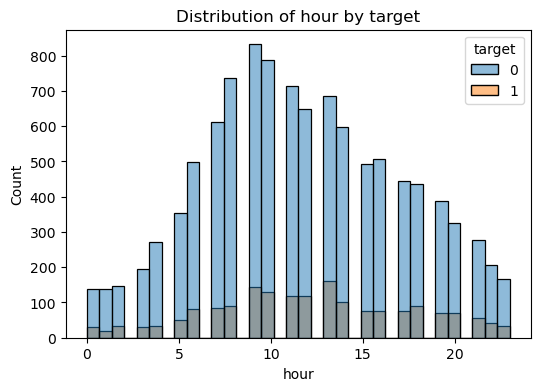

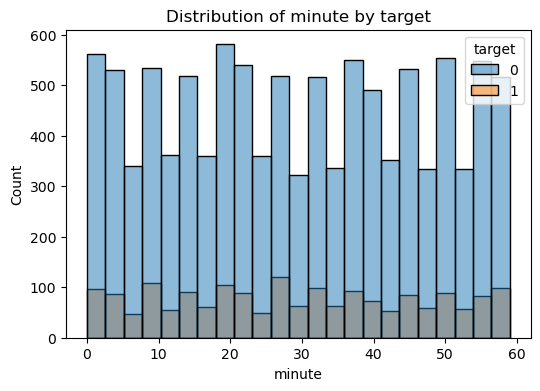

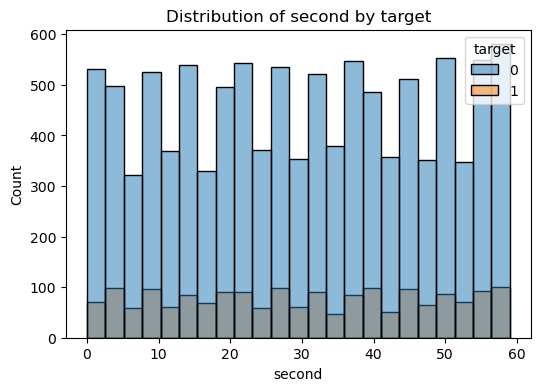

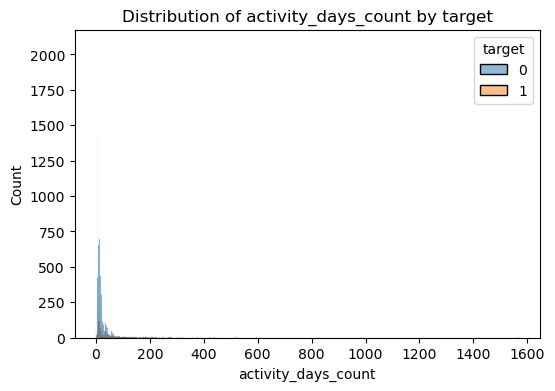

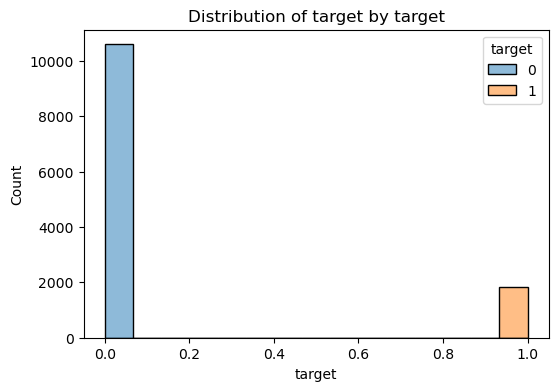

In [16]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize=(6,4))
        sns.histplot(data=df, x=col, hue="target", kde=False)
        plt.title(f"Distribution of {col} by target")
        plt.show()

# Submission Count Analysis
Show value counts for submission columns.

# Correlation & Feature Importance
Show correlations and mutual information scores for numeric features.

FeatureY                  -0.023208
minute                    -0.004053
second                     0.000990
subm count 4               0.018982
discussions_count          0.024847
hour                       0.028452
subm count 7               0.033416
subm count 5               0.041314
subm count 3               0.042744
Created At Day_of_month    0.050125
subm count 9               0.054651
subm count 6               0.058888
comments_count             0.059095
FeatureX                   0.076851
job_count                  0.082978
blog_activity_count        0.082978
subm count 8               0.084356
competitons_count          0.155183
subm count 10              0.157886
activity_days_count        0.224328
Created At Month           0.346127
target                     1.000000
Created At Year                 NaN
Name: target, dtype: float64

Created At Month           0.097101
activity_days_count        0.034685
Created At Day_of_month    0.022978
comments_count             0.007209
competitons_count          0.006913
subm count 6               0.005696
subm count 9               0.005352
subm count 10              0.005102
blog_activity_count        0.003289
subm count 7               0.002557
second                     0.002385
subm count 8               0.002297
subm count 3               0.002173
hour                       0.002075
job_count                  0.002015
subm count 4               0.001310
subm count 5               0.001163
FeatureY                   0.000248
Created At Year            0.000000
FeatureX                   0.000000
discussions_count          0.000000
minute                     0.000000
Name: MI_Score, dtype: float64

<Axes: >

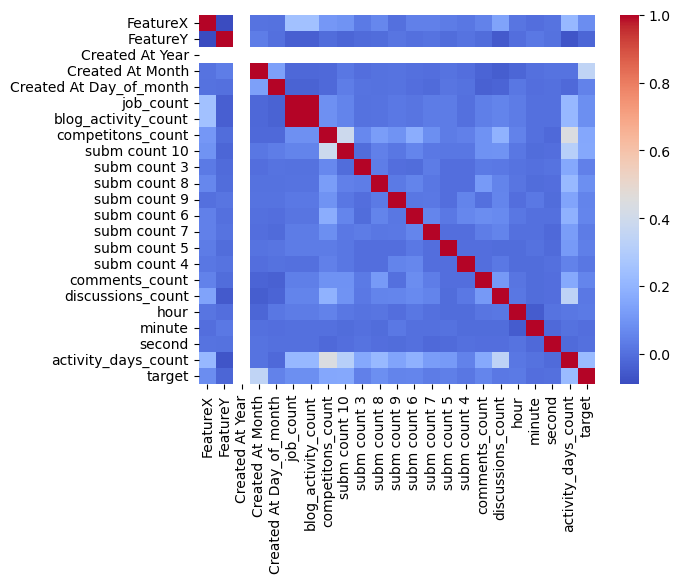

In [ ]:
num_df = df.select_dtypes(include="number")
display(num_df.corr()['target'].sort_values())
mi = mutual_info_classif(num_df.drop(columns="target"), num_df["target"], random_state= 42)
mi_scores = pd.Series(mi, index=num_df.drop(columns="target").columns, name="MI_Score").sort_values(ascending=False)
display(mi_scores) 
sns.heatmap(num_df.corr(), annot=False, cmap="coolwarm")

### PCA

### T SNE